In [125]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree


In [106]:
df=pd.read_csv('/content/HeartDisease.csv')
df

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [107]:
df.isnull().sum()

age                    0
gender                 0
chest_pain             0
rest_bps               0
cholestrol             0
fasting_blood_sugar    0
rest_ecg               0
thalach                0
exer_angina            0
old_peak               0
slope                  0
ca                     0
thalassemia            0
target                 0
dtype: int64

In [108]:
df.drop_duplicates(inplace = True)

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  302 non-null    int64  
 1   gender               302 non-null    int64  
 2   chest_pain           302 non-null    int64  
 3   rest_bps             302 non-null    int64  
 4   cholestrol           302 non-null    int64  
 5   fasting_blood_sugar  302 non-null    int64  
 6   rest_ecg             302 non-null    int64  
 7   thalach              302 non-null    int64  
 8   exer_angina          302 non-null    int64  
 9   old_peak             302 non-null    float64
 10  slope                302 non-null    int64  
 11  ca                   302 non-null    int64  
 12  thalassemia          302 non-null    int64  
 13  target               302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


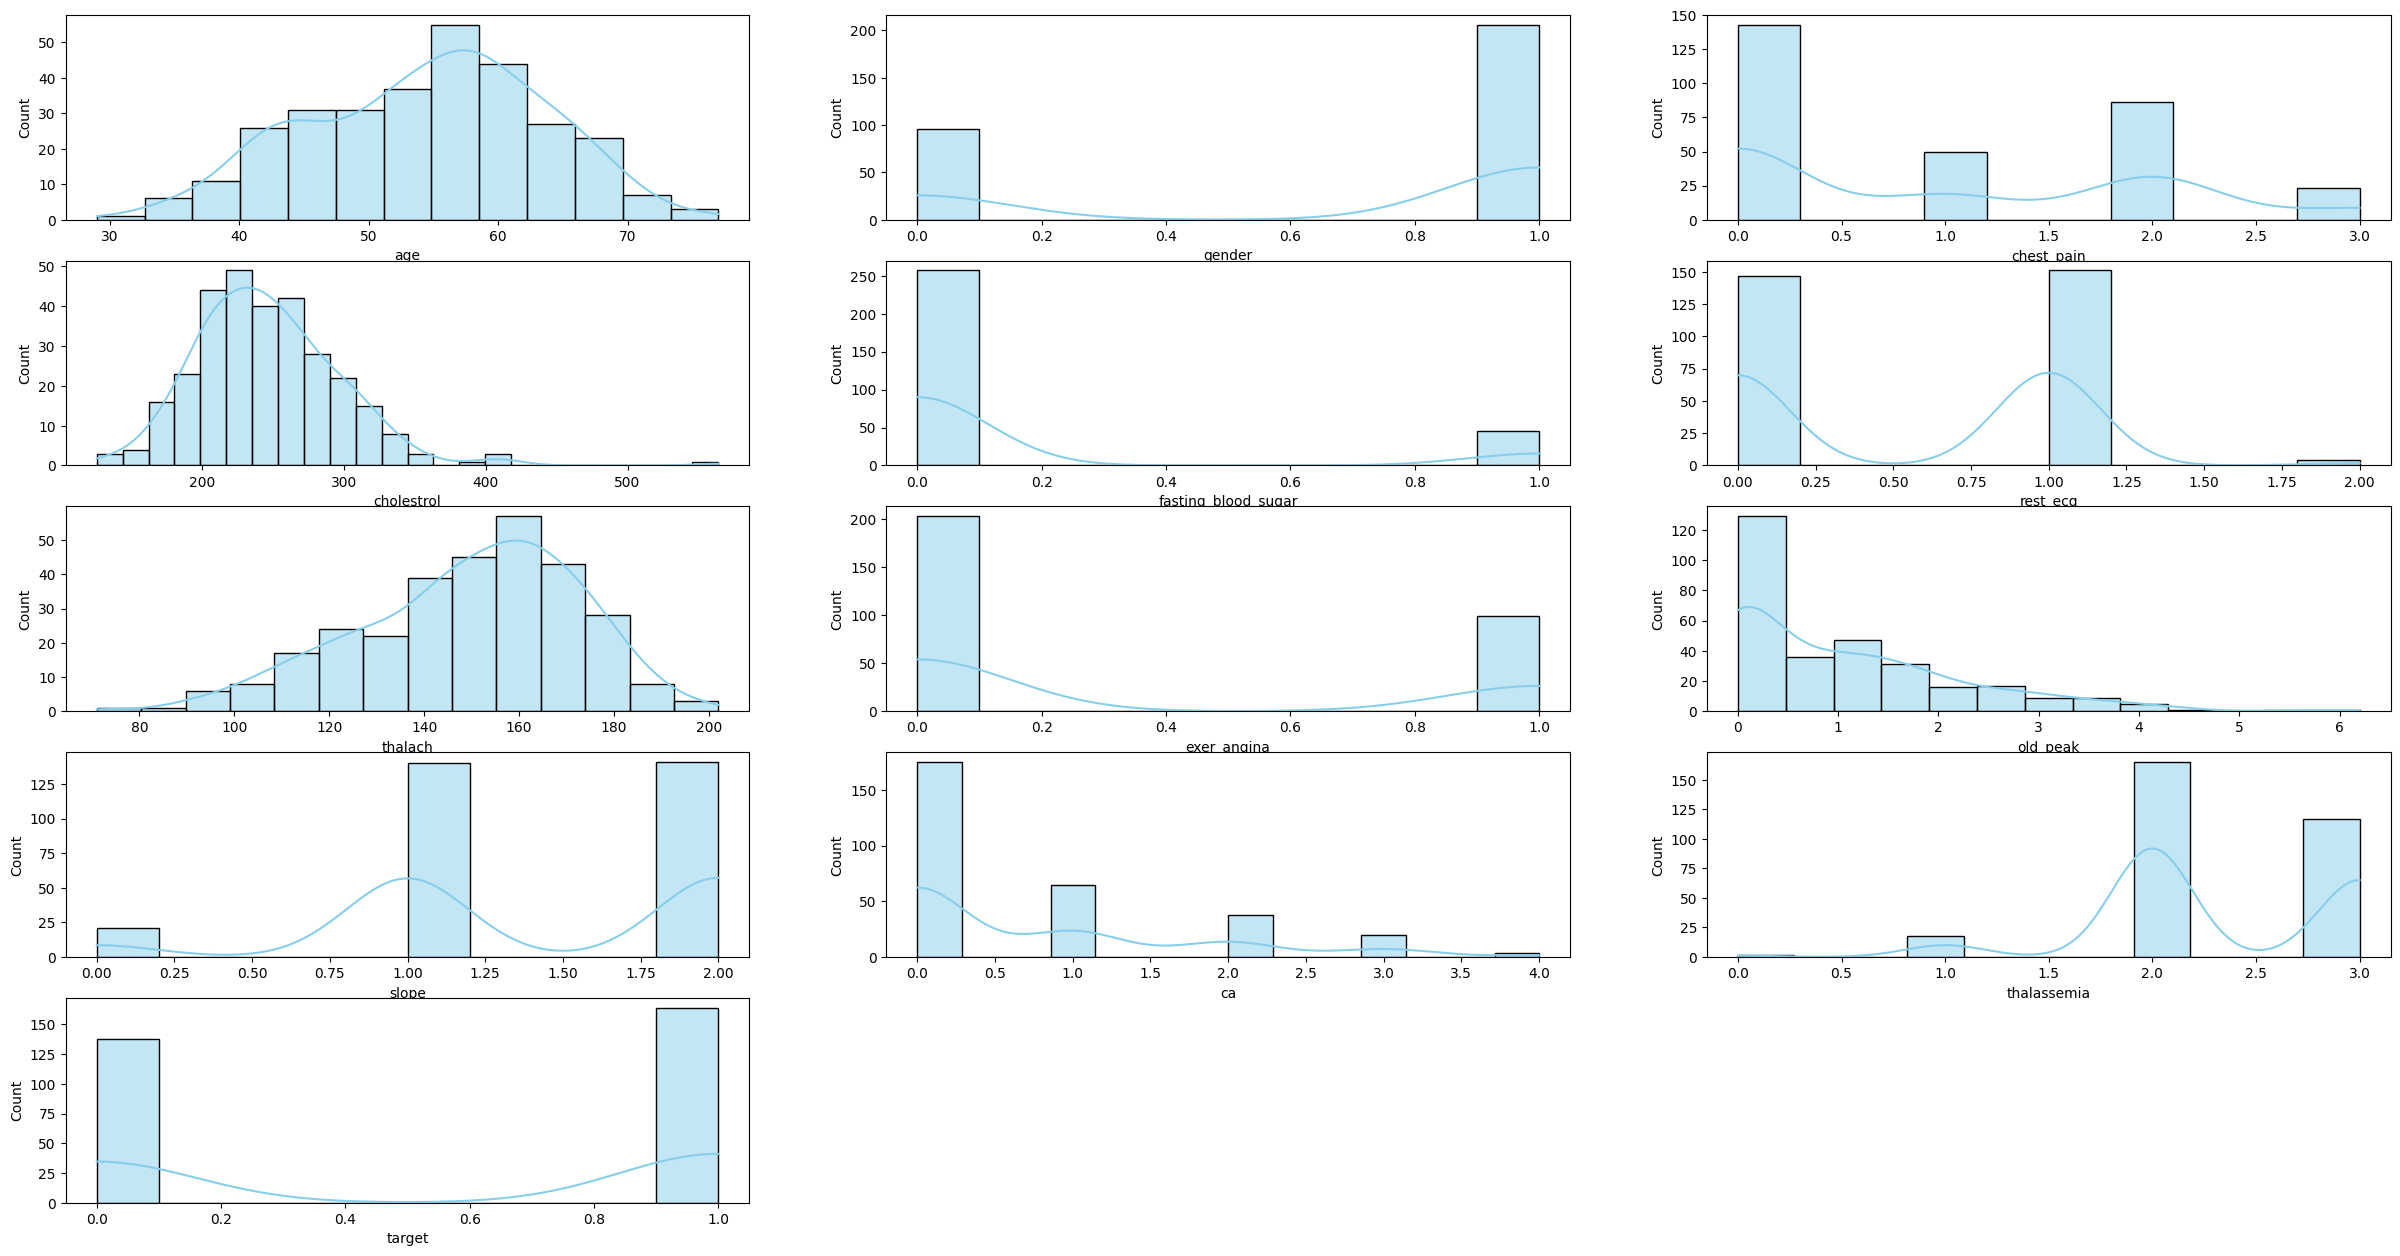

In [110]:
numerical =  ['age','gender','chest_pain','cholestrol','fasting_blood_sugar','rest_ecg','thalach','exer_angina','old_peak','slope','ca','thalassemia','target']
plt.figure(figsize=(30, 25))
for i, col in enumerate(numerical, 1):
    plt.subplot(8, 3, i)
    sns.histplot(data=df, x=col, kde=True, color='skyblue')
    plt.xlabel(col)
    plt.ylabel('Count')

In [111]:
df.corr()

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
gender,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
chest_pain,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
rest_bps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
cholestrol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fasting_blood_sugar,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
rest_ecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalach,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exer_angina,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
old_peak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


<Axes: >

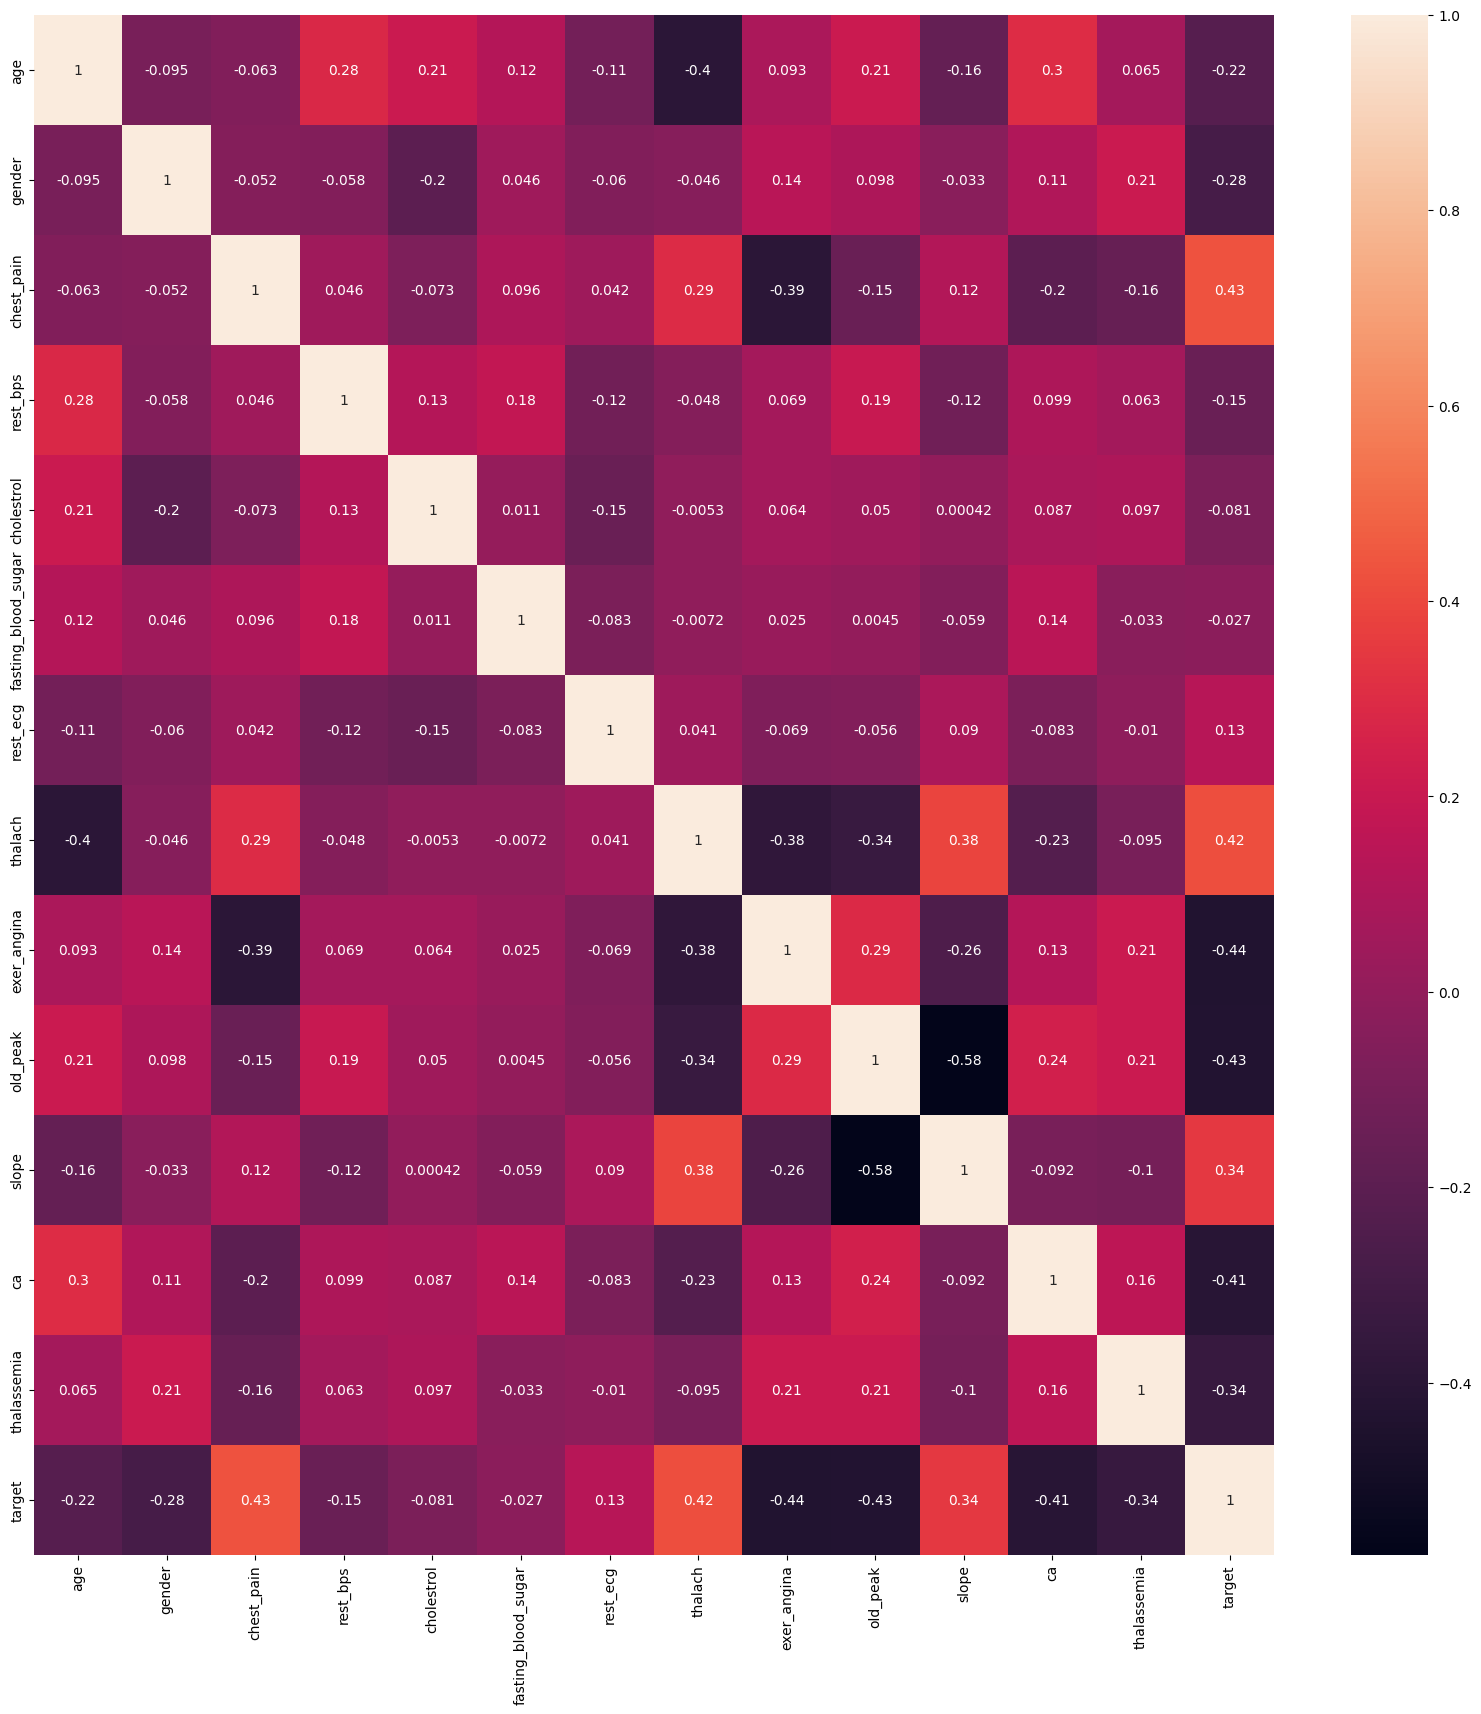

In [112]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot = True)

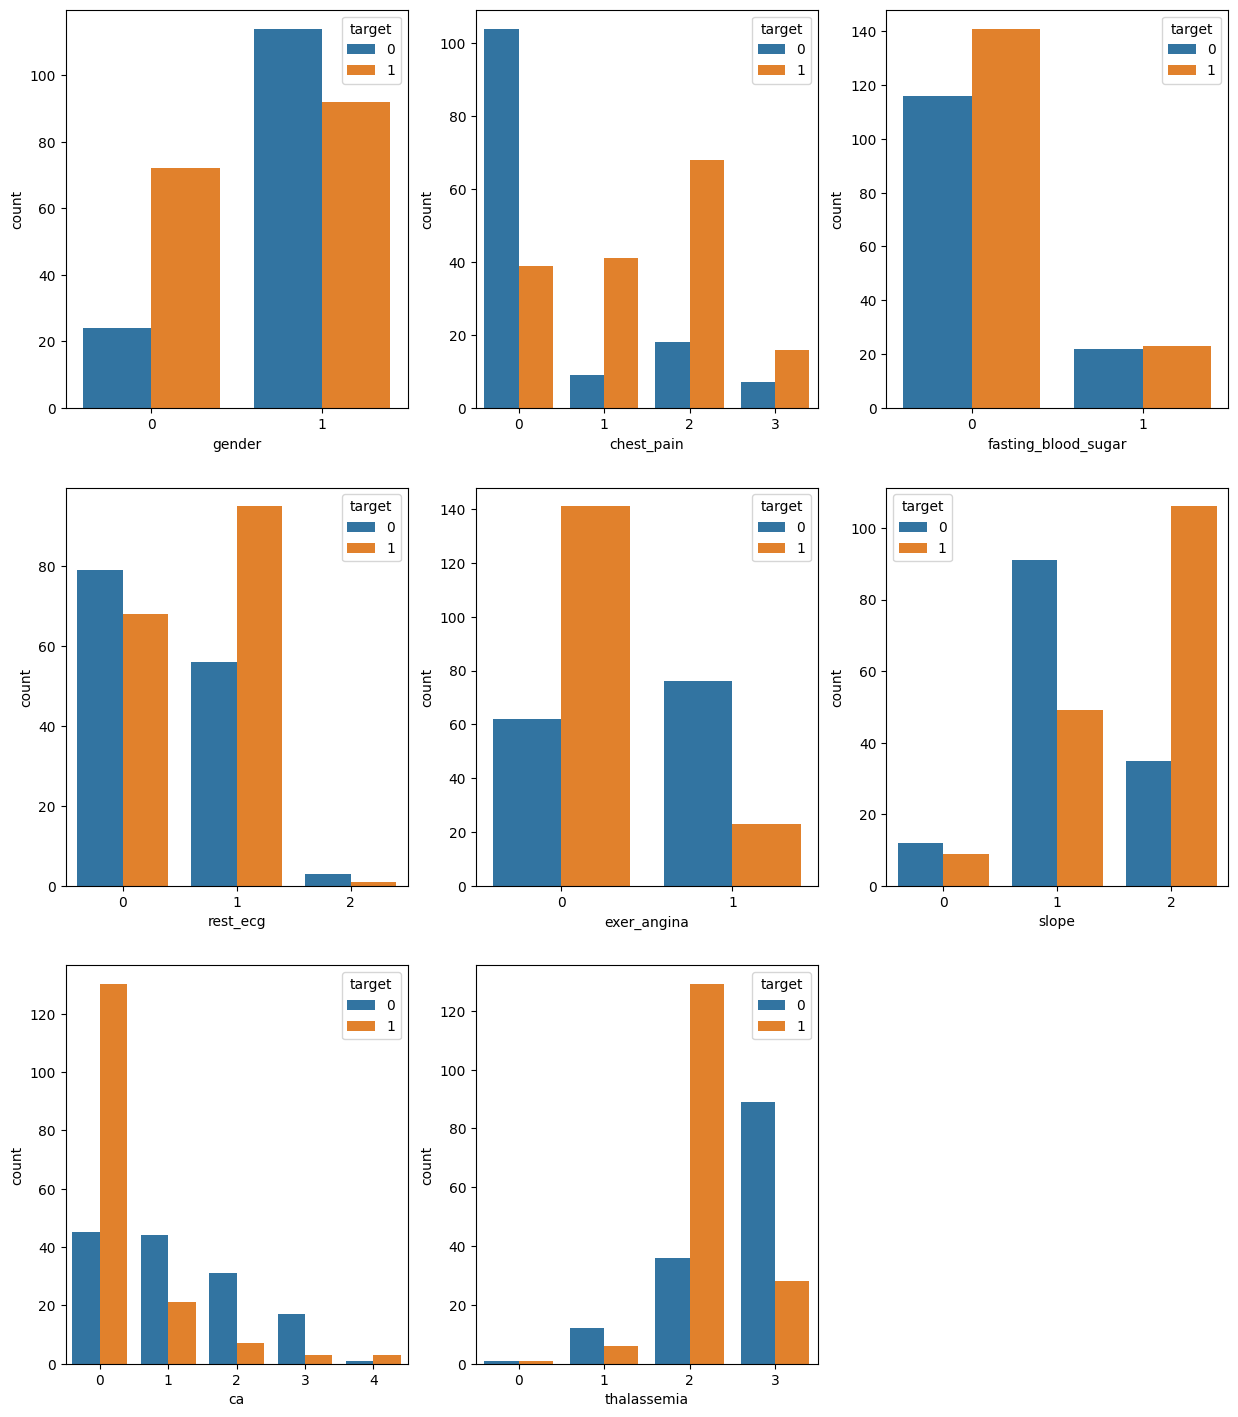

In [113]:
num = ['gender','chest_pain','fasting_blood_sugar','rest_ecg','exer_angina','slope','ca','thalassemia']
plt.figure(figsize=(15,30))
for i,col in enumerate(num,1):
  plt.subplot(5,3,i)
  sns.countplot(data = df, x= col,hue = 'target')

In [114]:
x= df.drop('target', axis =1)
y = df['target']

x_train,x_test,y_train,y_test = train_test_split(x,y ,train_size= 0.8, random_state= 2)
x_train,x_test,y_train,y_test

(     age  gender  chest_pain  rest_bps  cholestrol  fasting_blood_sugar  \
 237   60       1           0       140         293                    0   
 106   69       1           3       160         234                    1   
 10    54       1           0       140         239                    0   
 153   66       0           2       146         278                    0   
 77    59       1           1       140         221                    0   
 ..   ...     ...         ...       ...         ...                  ...   
 75    55       0           1       135         250                    0   
 22    42       1           0       140         226                    0   
 72    29       1           1       130         204                    0   
 15    50       0           2       120         219                    0   
 169   53       1           0       140         203                    1   
 
      rest_ecg  thalach  exer_angina  old_peak  slope  ca  thalassemia  
 237         

In [115]:
print(x_train.shape)
print(y_train.shape)

(241, 13)
(241,)


In [116]:
model = DecisionTreeClassifier()
model.fit(x_train,y_train)


DecisionTreeClassifier()

In [123]:
y_pred = model.predict(x_test)
y_pred


array([1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1])

In [126]:
accuracy=accuracy_score(y_test, y_pred)
conf=confusion_matrix(y_test, y_pred)
cla=classification_report(y_test, y_pred)
print(accuracy, conf, cla)

0.819672131147541 [[26  7]
 [ 4 24]]               precision    recall  f1-score   support

           0       0.87      0.79      0.83        33
           1       0.77      0.86      0.81        28

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



In [127]:
model.score(x_train,y_train)

1.0

In [128]:
model.score(x_test,y_test)

0.819672131147541

[Text(0.5238970588235294, 0.95, 'chest_pain <= 0.5\ngini = 0.492\nsamples = 241\nvalue = [105, 136]'),
 Text(0.25, 0.85, 'ca <= 0.5\ngini = 0.423\nsamples = 115\nvalue = [80, 35]'),
 Text(0.14705882352941177, 0.75, 'thalassemia <= 2.5\ngini = 0.497\nsamples = 56\nvalue = [26, 30]'),
 Text(0.058823529411764705, 0.65, 'thalach <= 119.5\ngini = 0.36\nsamples = 34\nvalue = [8, 26]'),
 Text(0.0392156862745098, 0.55, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.0784313725490196, 0.55, 'exer_angina <= 0.5\ngini = 0.305\nsamples = 32\nvalue = [6, 26]'),
 Text(0.0392156862745098, 0.45, 'cholestrol <= 316.5\ngini = 0.095\nsamples = 20\nvalue = [1, 19]'),
 Text(0.0196078431372549, 0.35, 'gini = 0.0\nsamples = 18\nvalue = [0, 18]'),
 Text(0.058823529411764705, 0.35, 'rest_bps <= 135.0\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.0392156862745098, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.0784313725490196, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.11764

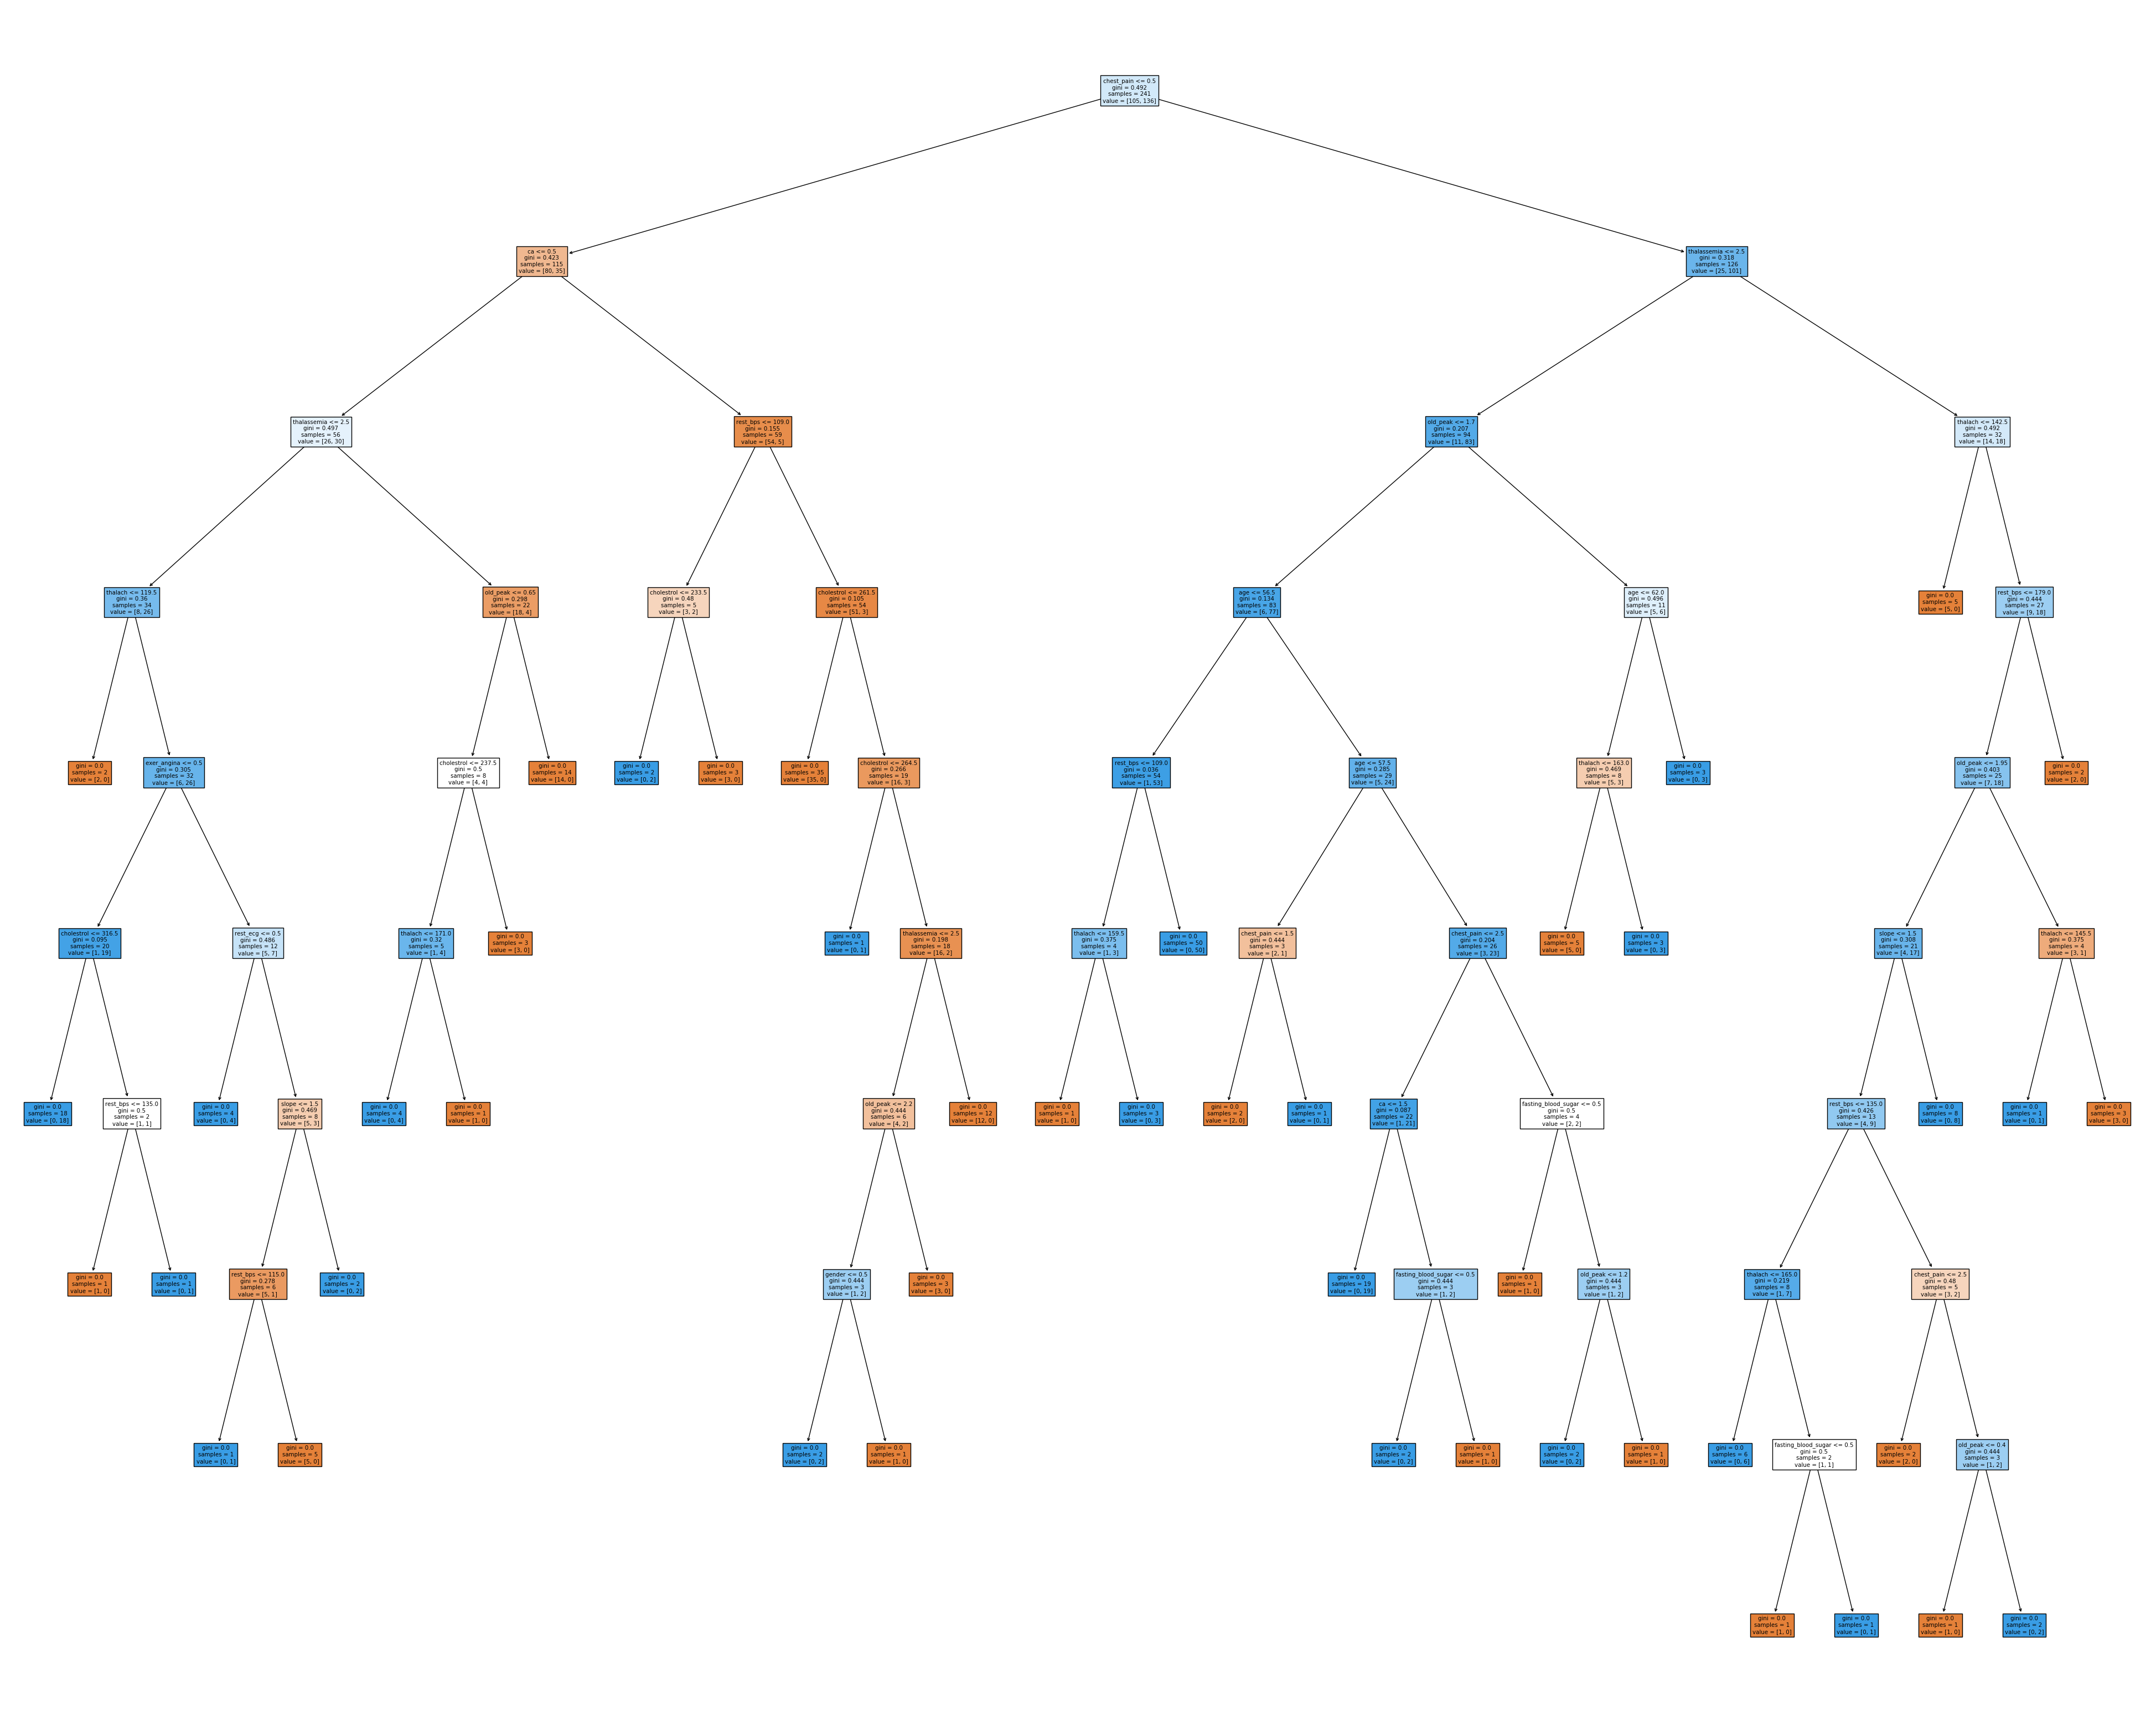

In [129]:
plt.figure(figsize=(50,40))
plot_tree(model,filled=True, feature_names=x.columns )

In [130]:
param_grid = {
    'criterion' : ['gini','entropy'],
    'max_depth' : [10,20,30,40,50],
    'min_samples_split' : [2,5,10],
    'min_samples_leaf' : [1,2,4]
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=84),param_grid , cv= 5)
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=84),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 30, 40, 50],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [131]:
best_model = grid_search.best_estimator_
predictions = best_model.predict(x_test)

accuracy=accuracy_score(y_test, predictions)
conf=confusion_matrix(y_test, predictions)
cla=classification_report(y_test, predictions)
print(accuracy, conf, cla)

0.8524590163934426 [[26  7]
 [ 2 26]]               precision    recall  f1-score   support

           0       0.93      0.79      0.85        33
           1       0.79      0.93      0.85        28

    accuracy                           0.85        61
   macro avg       0.86      0.86      0.85        61
weighted avg       0.86      0.85      0.85        61



In [132]:
model = LogisticRegression()
model.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [133]:
y_pred = model.predict(x_test)
y_pred

array([1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1])

In [134]:
accuracy=accuracy_score(y_test, y_pred)
conf=confusion_matrix(y_test, y_pred)
cla=classification_report(y_test, y_pred)
print(accuracy, conf, cla)

0.8852459016393442 [[26  7]
 [ 0 28]]               precision    recall  f1-score   support

           0       1.00      0.79      0.88        33
           1       0.80      1.00      0.89        28

    accuracy                           0.89        61
   macro avg       0.90      0.89      0.89        61
weighted avg       0.91      0.89      0.88        61



In [135]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [136]:
y_pred = model.predict(x_test)
y_pred

array([ 0.65468211,  0.62440709,  0.64667908,  0.99063249,  0.25573379,
        0.30010624,  0.6689738 ,  0.7310451 ,  0.27016918,  0.68175681,
        0.1285895 ,  0.86050083,  0.06309754, -0.16011316,  1.19233003,
        1.00827909,  0.03764935,  0.88864035,  0.10337445,  0.32699213,
        0.88053139,  0.65147767,  0.52930639, -0.10417602,  0.25095819,
        0.648576  ,  1.0986073 ,  0.63959076,  0.06622582,  0.84163827,
        0.68313954,  1.04159642, -0.13869689,  0.13445262,  0.83731384,
       -0.33608999,  0.84721242,  0.52530707,  0.18992647,  0.29664977,
        1.10662398,  0.46435882,  0.38724681,  0.56064907,  1.06256125,
        0.56597848,  0.18991629,  0.70152927,  0.65917754,  0.71997321,
        1.06136927, -0.14612537,  0.72025778, -0.03981378,  0.11245033,
        0.90155465, -0.11242143,  0.92106006,  0.9223286 , -0.09922802,
        0.45288269])

In [137]:
mse = mean_squared_error(y_test,y_pred)
mse

0.10521171216939192

In [138]:
r2= r2_score(y_test,y_pred)
r2

0.576306514088412